In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv"



/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


'/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv'

In [2]:
#kütüphanelerin eklenmesi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#datasetin notebooka dahil edilmesi

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
df = df_.copy()

In [4]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [5]:
# Veri setinin ilk 3 gözlemini görelim.
df.head(n = 3)

# Sondan 3 gözlem için tail() metodu kullanılabilir.
df.tail(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271113,135570.0,Piotr ya,M,NaN,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571.0,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002.0,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
#verisetindeki satır ve sütun sayısını sırasıyla görmek için alttaki kod kullanılır
#df.shape
#bir üstteki örnekte sütun sayısı 15 olduğundan bu çıktının ikinci değeri de aynı olmalı).

#print() fonksiyonu kullanılarak veriseti, satır ve sütun sayısıyla birlikte yazdırılır .
##print(df)

#Yalnızca satır ve sütun sayısını görmek için alttaki kod kullanılır.
#Kod sonuna [0] indeksi eklenerek yalnızca satır, [1] eklenerek yalnızca sütun sayısı görülebilir.
print(df.shape) 
print(df.shape[0])
print(df.shape[1])

#verisetindeki sütun başlıkları .columns özelliğiyle görülebilir.
print((df.columns))

#verisetindeki sütun başlıklarının ve veri tipinin görüntülenmesi için alttaki kod kullanılabilir.
print(df.dtypes)





(271116, 15)
271116
15
Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')
ID        float64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year      float64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object



  ## 2-Eksik Veri Analizi  <a class="anchor"  id="chapter1"></a>


In [7]:
df.isna().sum() # eksik verilerin (NA) toplamında, -> isna() methodu yerine isnull() methodu da kullanılabilir. (Madalya almayan yarışmacılar NA alınmıştır)

ID          8047
Name        8138
Sex         8060
Age        17234
Height     66364
Weight     69049
Team        7985
NOC         8006
Games       7837
Year        8078
Season      7994
City        7947
Sport       8085
Event       8067
Medal     232503
dtype: int64

In [8]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,NaN,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570.0,Piotr ya,M,NaN,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


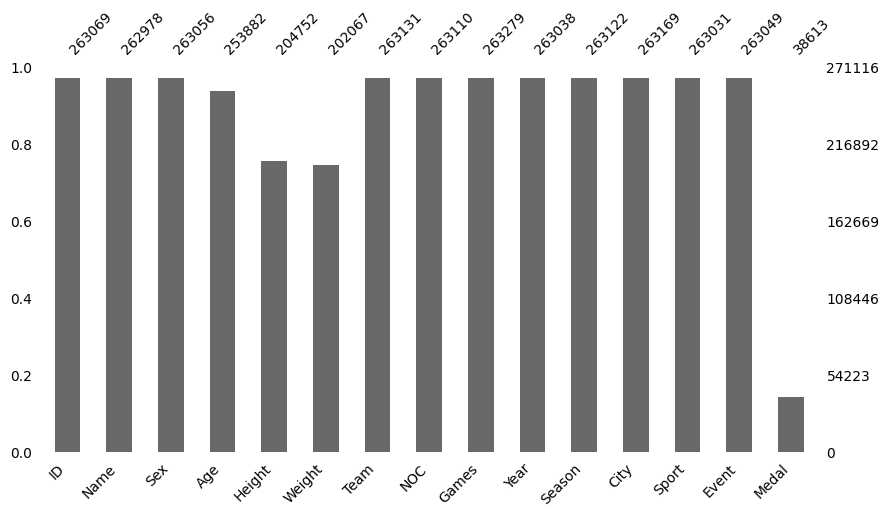

In [9]:
#!pip install missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemeniz lazım.
import missingno as msno

msno.bar(df = df,
         figsize = (10, 5),
         fontsize = 10);

#çıktı sonucu "Medal" değeri minimum "Games" değeri maksimum çıktı. önceki yapılan isnull sorgusunda bu durum tam tersiydi

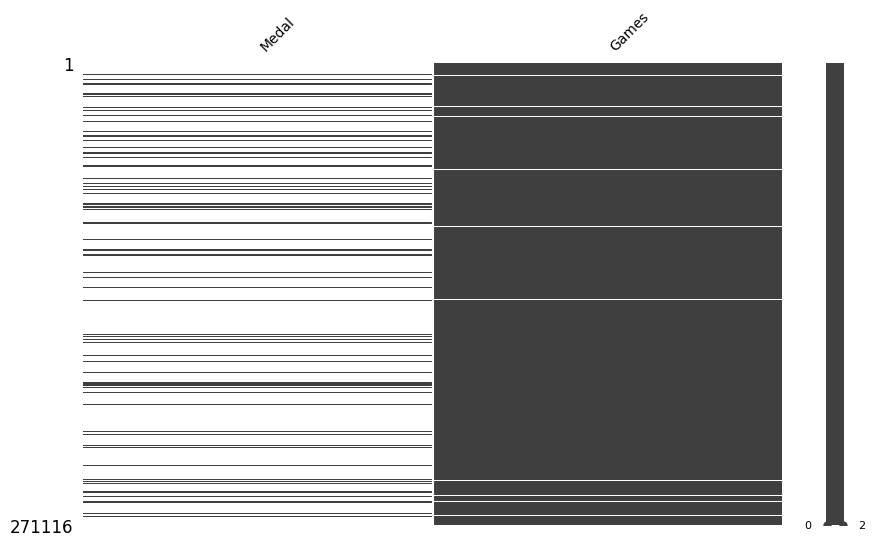

In [10]:
# msno.matrix() ile Medal" başlığındaki eksik verilerin "Games" başlığına etkisi görülmektedir.
msno.matrix(df = df[['Medal', 'Games']],
            figsize = (10, 6),
            fontsize = 10);


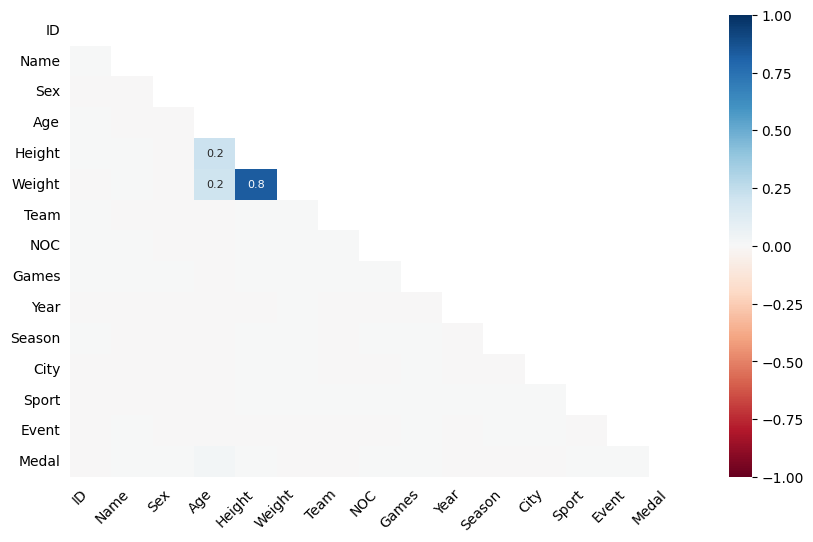

In [11]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);


  ## 3-Eksik verilerin silinmesi  <a class="anchor"  id="chapter1"></a>

In [12]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı kullanılmalı veya atama yapılmalıdır.
# Indeksler keyfi seçilmiştir. Bu örnek için hiçbir NA değeri içermeyen ilk 4 kayıt getirilecektir.

df.dropna(inplace = False)[0:4]
#df = df.dropna()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,17.0,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
50,17.0,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952.0,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
60,20.0,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992.0,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
64,20.0,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994.0,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze


  ## 4-Eksik Verilerin Doldurulması  <a class="anchor"  id="chapter1"></a>

In [13]:
# Eksik verilerin silinmesi dışındaki bir diğer yönetim verilerin doldurulmasıdır.
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturulur.
df_fillna = df.copy()

df_fillna.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN


In [14]:
df_fillna.isna().sum()


ID          8047
Name        8138
Sex         8060
Age        17234
Height     66364
Weight     69049
Team        7985
NOC         8006
Games       7837
Year        8078
Season      7994
City        7947
Sport       8085
Event       8067
Medal     232503
dtype: int64

### 

In [15]:
#Mod medyan, açıklık bilgilerinin alınması. (int değerleri için alınmıştır. ID ile ilgili sonuçlar anlamsızdır) 
df.describe().T



,count,mean,std,min,25%,50%,75%,max
ID,263069.0,68250.830083,39020.694594,1.0,34645.0,68200.0,102106.0,135571.0
Age,253882.0,25.557873,6.395139,10.0,21.0,24.0,28.0,97.0
Height,204752.0,175.339430,10.517596,127.0,168.0,175.0,183.0,226.0
Weight,202067.0,70.697143,14.344587,25.0,60.0,70.0,79.0,214.0
Year,263038.0,1978.373855,29.874297,1896.0,1960.0,1988.0,2002.0,2016.0


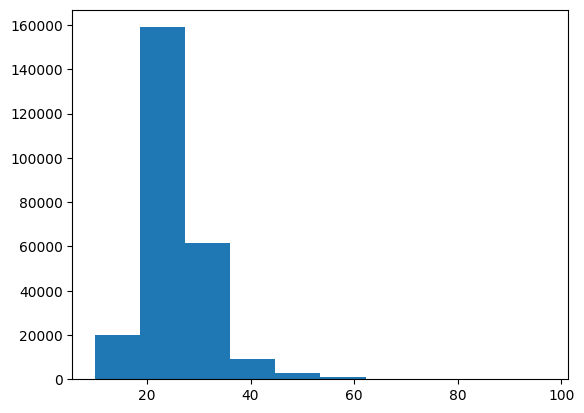

In [16]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(df['Age'])
plt.show()
#Grafik 20-30 yaş arasındakilerin olimpiyat katılımının yüksek olduğunu gösteriyor

  ## 5-Feature Engineering  <a class="anchor"  id="chapter1"></a>

In [17]:
def age_range(Age):
    if Age < 20:
        return 'very young'
    elif 20 <= Age <= 30:
        return 'young'
    elif 30 <= Age <= 40:
        return 'old'
    else:
        return 'very old'

df['age_range'] = df['Age'].apply(age_range)

df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,age_range
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,young
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,young
2,3.0,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,young
3,4.0,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,old
4,5.0,Christine Jacoba Aaftink,F,21.0,NaN,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,young
5,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,young
6,5.0,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NaN,NED,1992 Winter,1992.0,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,young
7,5.0,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992.0,Winter,Albertville,NaN,"Speed Skating Women's 1,000 metres",NaN,young
8,5.0,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994.0,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,young
9,5.0,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994.0,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,young


  ## 5-Sonuç ve Öneriler  <a class="anchor"  id="chapter1"></a>

#-Verisetinde madalya almayanlar için atanan NA değerlerinin drop edilmesi veriseti kalitesini etkilemiştir(271117 kayıtta 231333 NA madalya)/n
#-Olimpiyatlara katılan yarışmacıların genellikle 20-30 yaş arası olduğu görülmüştür. Medyan(ortalama) değeri 25 bulunmuştur.

